## Case Study 1: How Does a Bike-Share Navigate Speedy Success?

***

## Project Description

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes di

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| |	Trip start day and time|
| |	Trip end day and time|
| |	Trip start station|
| |	Trip end station|
| |	Rider type (Member, Single Ride, and Day Pass)|


## Data sources used

Divvy Data - The data has been processed to remove trips that are taken by staff as they service and inspect the system; and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure).

## Business Task

How do annual members and casual riders use Cyclistic bikes differently?

Why would casual riders buy Cyclistic annual memberships?

How can Cyclistic use digital media to influence casual riders to become members?

## Metrics

## Assumptions

## Data Tasks

- 
- 
- 
- 
- 
-

## Summary

- Casual riders spent more time in bikes
- Popular spot is Lake Shore Dr & Monroe St
- Classic bikes are most rented
- Docked bikes spent most time cycling
- Saturday has highest count of rented bikes
- Member riders love classic and electric bikes but casual riders prefer docked bikes
- Member riders have been in consistent usage for all days, same for casual riders
- Member riders spent less time biking than casual riders
- Majority of time spent riding whole one week is less than 5000 minutes or 83 hours

## Recommendation for Action

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("202103-divvy-tripdata.csv",parse_dates=['started_at','ended_at'])

In [3]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.92,-87.70,41.92,-87.69,casual
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.92,-87.70,41.91,-87.72,casual
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.84,-87.64,41.83,-87.65,casual
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.97,-87.66,41.95,-87.65,casual
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.01,-87.67,42.05,-87.68,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
228491,9397BDD14798A1BA,docked_bike,2021-03-20 14:58:56,2021-03-20 17:22:47,Michigan Ave & Oak St,13042,New St & Illinois St,TA1306000013,41.90,-87.62,41.89,-87.62,casual
228492,BBBEB8D51AAD40DA,classic_bike,2021-03-02 11:35:10,2021-03-02 11:43:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.89,-87.64,41.89,-87.62,member
228493,637FF754DA0BD9E1,classic_bike,2021-03-09 11:07:36,2021-03-09 11:49:11,Michigan Ave & Oak St,13042,Clark St & Berwyn Ave,KA1504000146,41.90,-87.62,41.98,-87.67,member
228494,F8F43A0B978A7A35,classic_bike,2021-03-01 18:11:57,2021-03-01 18:18:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.89,-87.64,41.89,-87.62,member


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228496 entries, 0 to 228495
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             228496 non-null  object        
 1   rideable_type       228496 non-null  object        
 2   started_at          228496 non-null  datetime64[ns]
 3   ended_at            228496 non-null  datetime64[ns]
 4   start_station_name  213648 non-null  object        
 5   start_station_id    213648 non-null  object        
 6   end_station_name    211769 non-null  object        
 7   end_station_id      211769 non-null  object        
 8   start_lat           228496 non-null  float64       
 9   start_lng           228496 non-null  float64       
 10  end_lat             228329 non-null  float64       
 11  end_lng             228329 non-null  float64       
 12  member_casual       228496 non-null  object        
dtypes: datetime64[ns](2), float64

In [5]:
df.describe(include='all')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,228496,228496,228496,228496,213648,213648,211769,211769,228496.00,228496.00,228329.00,228329.00,228496
unique,228496,3,209025,208629,673,673,673,673,nan,nan,nan,nan,2
top,344E493DA4E38158,classic_bike,2021-03-21 13:41:24,2021-03-29 12:32:25,Lake Shore Dr & Monroe St,13300,Lake Shore Dr & Monroe St,13300,nan,nan,nan,nan,member
freq,1,152545,5,7,2453,2453,2380,2380,nan,nan,nan,nan,144463
first,NaN,NaN,2021-03-01 00:01:09,2021-03-01 00:06:28,NaN,NaN,NaN,NaN,nan,nan,nan,nan,NaN
last,NaN,NaN,2021-03-31 23:59:08,2021-04-06 11:00:11,NaN,NaN,NaN,NaN,nan,nan,nan,nan,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.90,-87.64,41.90,-87.65,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.03,0.04,0.03,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.65,-87.78,41.64,-88.07,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.88,-87.66,41.88,-87.66,NaN


In [6]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual'], dtype='object')

In [7]:
df["time_diff"] = df['ended_at'] - df['started_at']

In [8]:
df["time_diff"] = df["time_diff"]/np.timedelta64(1,'m') #Convert to minutes

In [9]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_diff
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.92,-87.70,41.92,-87.69,casual,4.07
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.92,-87.70,41.91,-87.72,casual,10.45
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.84,-87.64,41.83,-87.65,casual,16.40
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.97,-87.66,41.95,-87.65,casual,28.98
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.01,-87.67,42.05,-87.68,casual,17.93


In [10]:
df["weekday"] = df["started_at"].dt.weekday

In [11]:
df.head() #Return the day of the week as an integer, where Monday is 0 and Sunday is 6

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_diff,weekday
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.92,-87.70,41.92,-87.69,casual,4.07,1
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.92,-87.70,41.91,-87.72,casual,10.45,6
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.84,-87.64,41.83,-87.65,casual,16.40,3
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.97,-87.66,41.95,-87.65,casual,28.98,3
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.01,-87.67,42.05,-87.68,casual,17.93,6


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228496 entries, 0 to 228495
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             228496 non-null  object        
 1   rideable_type       228496 non-null  object        
 2   started_at          228496 non-null  datetime64[ns]
 3   ended_at            228496 non-null  datetime64[ns]
 4   start_station_name  213648 non-null  object        
 5   start_station_id    213648 non-null  object        
 6   end_station_name    211769 non-null  object        
 7   end_station_id      211769 non-null  object        
 8   start_lat           228496 non-null  float64       
 9   start_lng           228496 non-null  float64       
 10  end_lat             228329 non-null  float64       
 11  end_lng             228329 non-null  float64       
 12  member_casual       228496 non-null  object        
 13  time_diff           228496 no

### Save to CSV

In [13]:
#df.to_csv("bike.csv", index=False)

### Groupby Function

In [14]:
df.groupby("start_station_name")["ride_id"].count().sort_values()

start_station_name
Commercial Ave & 100th St           1
N Hampden Ct & W Diversey Ave       1
N Damen Ave & W Wabansia St         1
N Carpenter St & W Lake St          1
Ashland Ave & Garfield Blvd         1
                                 ... 
Wells St & Elm St                1660
Millennium Park                  1757
Clark St & Elm St                1935
Streeter Dr & Grand Ave          2074
Lake Shore Dr & Monroe St        2453
Name: ride_id, Length: 673, dtype: int64

In [15]:
df.groupby("end_station_name")["ride_id"].count().sort_values()

end_station_name
Bradley Park                    1
Halsted St & 96th St            1
Halsted St & 69th St            1
Halsted St & 59th St            1
Marshfield Ave & 59th St        1
                             ... 
Michigan Ave & Oak St        1714
Millennium Park              1869
Clark St & Elm St            1924
Streeter Dr & Grand Ave      2039
Lake Shore Dr & Monroe St    2380
Name: ride_id, Length: 673, dtype: int64

In [16]:
df.groupby("rideable_type")["ride_id"].count().sort_values()

rideable_type
docked_bike       15657
electric_bike     60294
classic_bike     152545
Name: ride_id, dtype: int64

In [17]:
df.groupby("member_casual")["ride_id"].count().sort_values()

member_casual
casual     84033
member    144463
Name: ride_id, dtype: int64

In [18]:
df.groupby("start_station_name")["time_diff"].mean().sort_values()

start_station_name
S Wentworth Ave & W 111th St            2.98
Stewart Ave & 63rd St                   4.28
State St & 76th St                      5.89
Eggleston Ave & 69th St                 5.97
N Sheffield Ave & W Wellington Ave      6.87
                                       ...  
Dauphin Ave & 103rd St                413.96
Karlov Ave & Madison St               546.61
Ashland Ave & 66th St                 755.54
Elizabeth St & 92nd St                968.84
East End Ave & 87th St               3869.29
Name: time_diff, Length: 673, dtype: float64

In [19]:
df.groupby("rideable_type")["time_diff"].mean().sort_values()

rideable_type
electric_bike   16.43
classic_bike    19.38
docked_bike     81.64
Name: time_diff, dtype: float64

In [20]:
df.groupby("member_casual")["time_diff"].mean().sort_values()

member_casual
member   13.97
casual   38.16
Name: time_diff, dtype: float64

### Pandas-Profiling Reports

In [21]:
profile = ProfileReport(df=df, title='Bike Report', minimal=True)

In [22]:
profile.to_notebook_iframe()

In [23]:
profile.to_file("bike_report.html")

### Drop unwanted features

In [24]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'time_diff', 'weekday'], dtype='object')

In [25]:
df.drop(['ride_id','start_station_id','end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'],axis=1,inplace=True)

In [26]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,time_diff,weekday
0,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,Stave St & Armitage Ave,casual,4.07,1
1,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,Central Park Ave & Bloomingdale Ave,casual,10.45,6
2,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,Halsted St & 35th St,casual,16.40,3
3,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,Broadway & Sheridan Rd,casual,28.98,3
4,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,Chicago Ave & Sheridan Rd,casual,17.93,6


### Treat Missing Values

In [27]:
df.isnull().sum()

rideable_type             0
started_at                0
ended_at                  0
start_station_name    14848
end_station_name      16727
member_casual             0
time_diff                 0
weekday                   0
dtype: int64

In [28]:
df['start_station_name'] = df['start_station_name'].replace(np.nan,"Missing")

In [29]:
df['end_station_name'] = df['end_station_name'].replace(np.nan,"Missing")

In [30]:
df.isnull().sum()

rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
member_casual         0
time_diff             0
weekday               0
dtype: int64

In [31]:
df.describe()

,time_diff,weekday
count,228496.00,228496.00
mean,22.87,3.08
std,154.42,2.10
min,-0.02,0.00
25%,6.83,1.00
50%,12.32,3.00
75%,23.10,5.00
max,31681.65,6.00


## Data Visualization

### Univariate Data Exploration

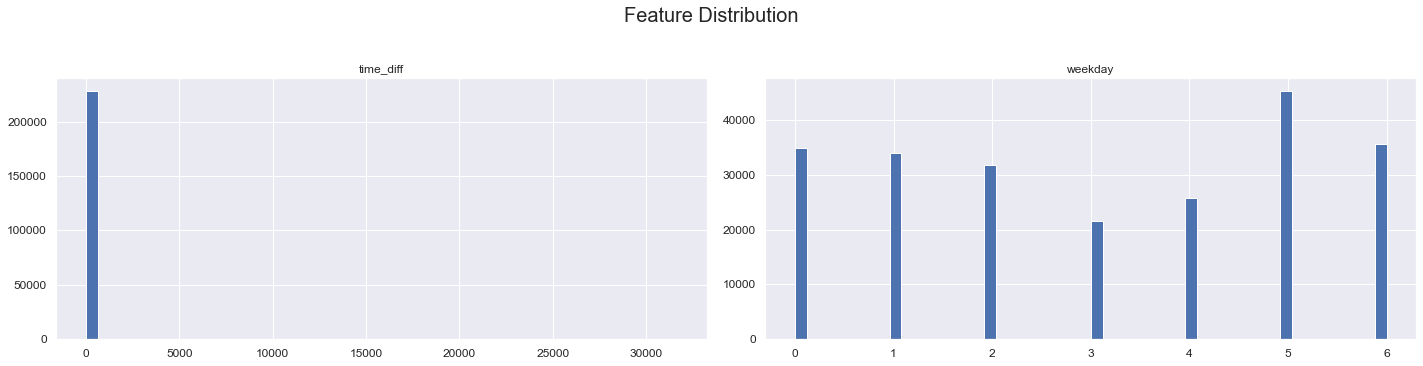

In [32]:
df.hist(bins=50, figsize=(20,5))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

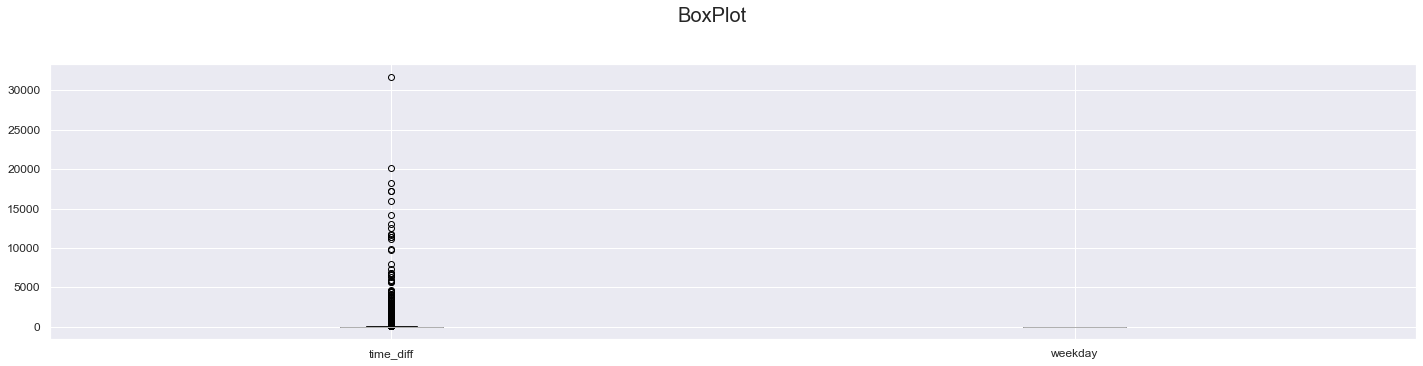

In [33]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

<Figure size 1440x1440 with 0 Axes>

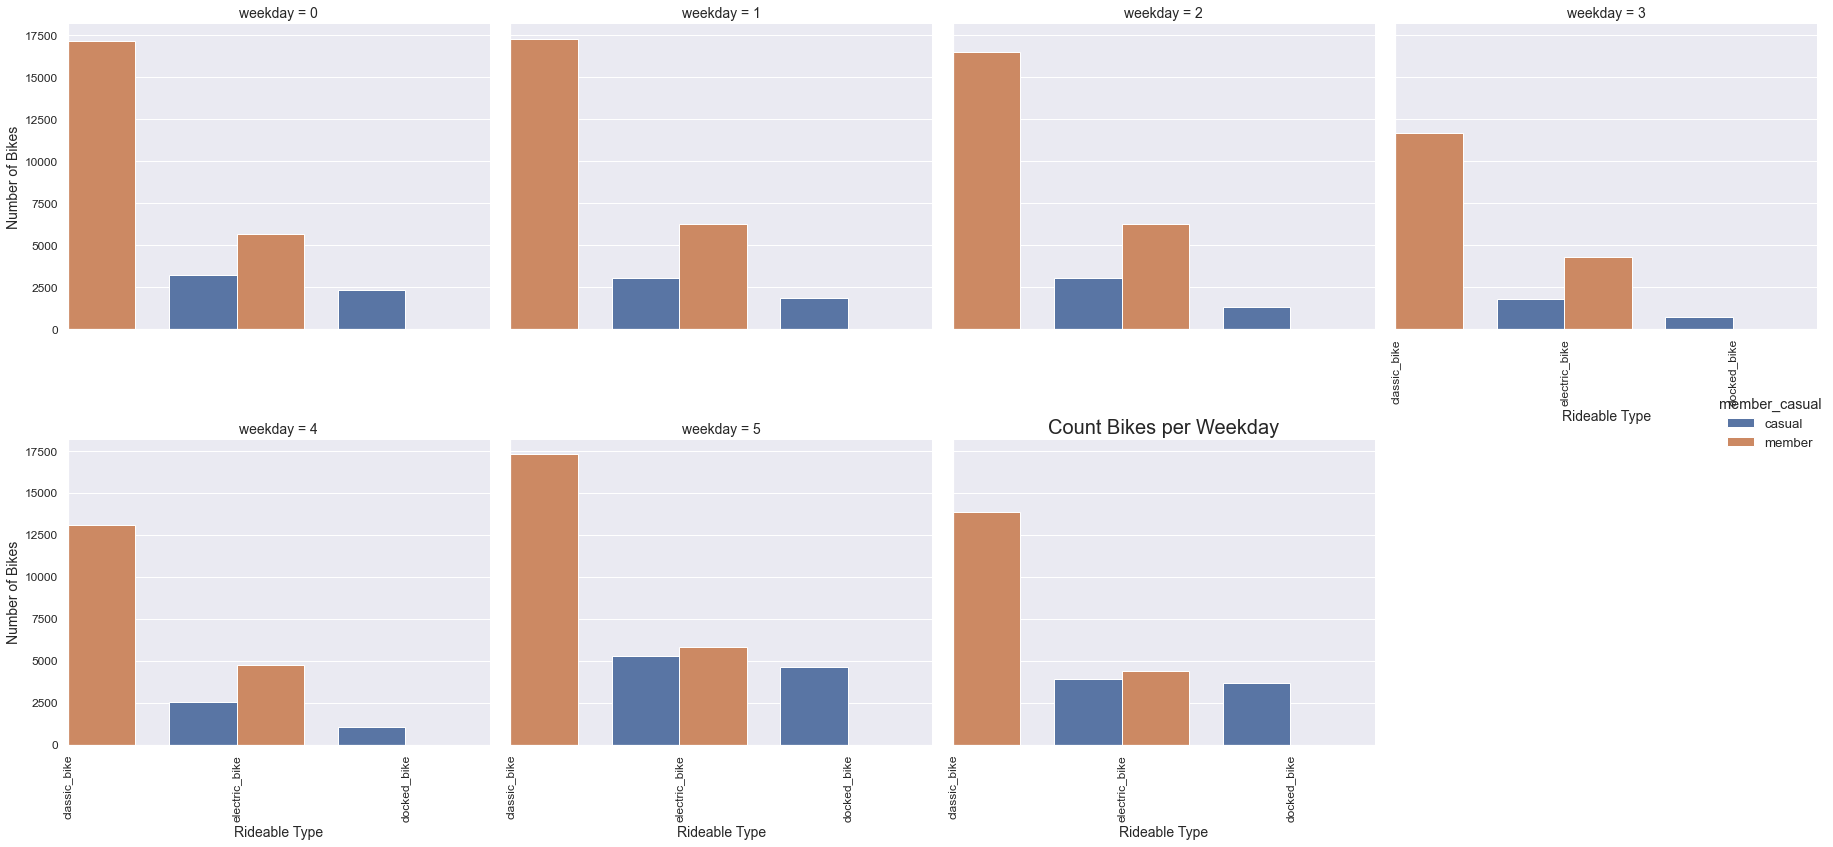

In [34]:
plt.figure(figsize=(20,20))


g = sns.catplot(x='rideable_type', hue='member_casual', col = 'weekday', col_wrap=4,
            kind='count', data=df,
            height = 6, aspect = 1)

g.set_xlabels("Rideable Type")
g.set_ylabels("Number of Bikes")
plt.title("Count Bikes per Weekday", size=20)
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1440x1440 with 0 Axes>

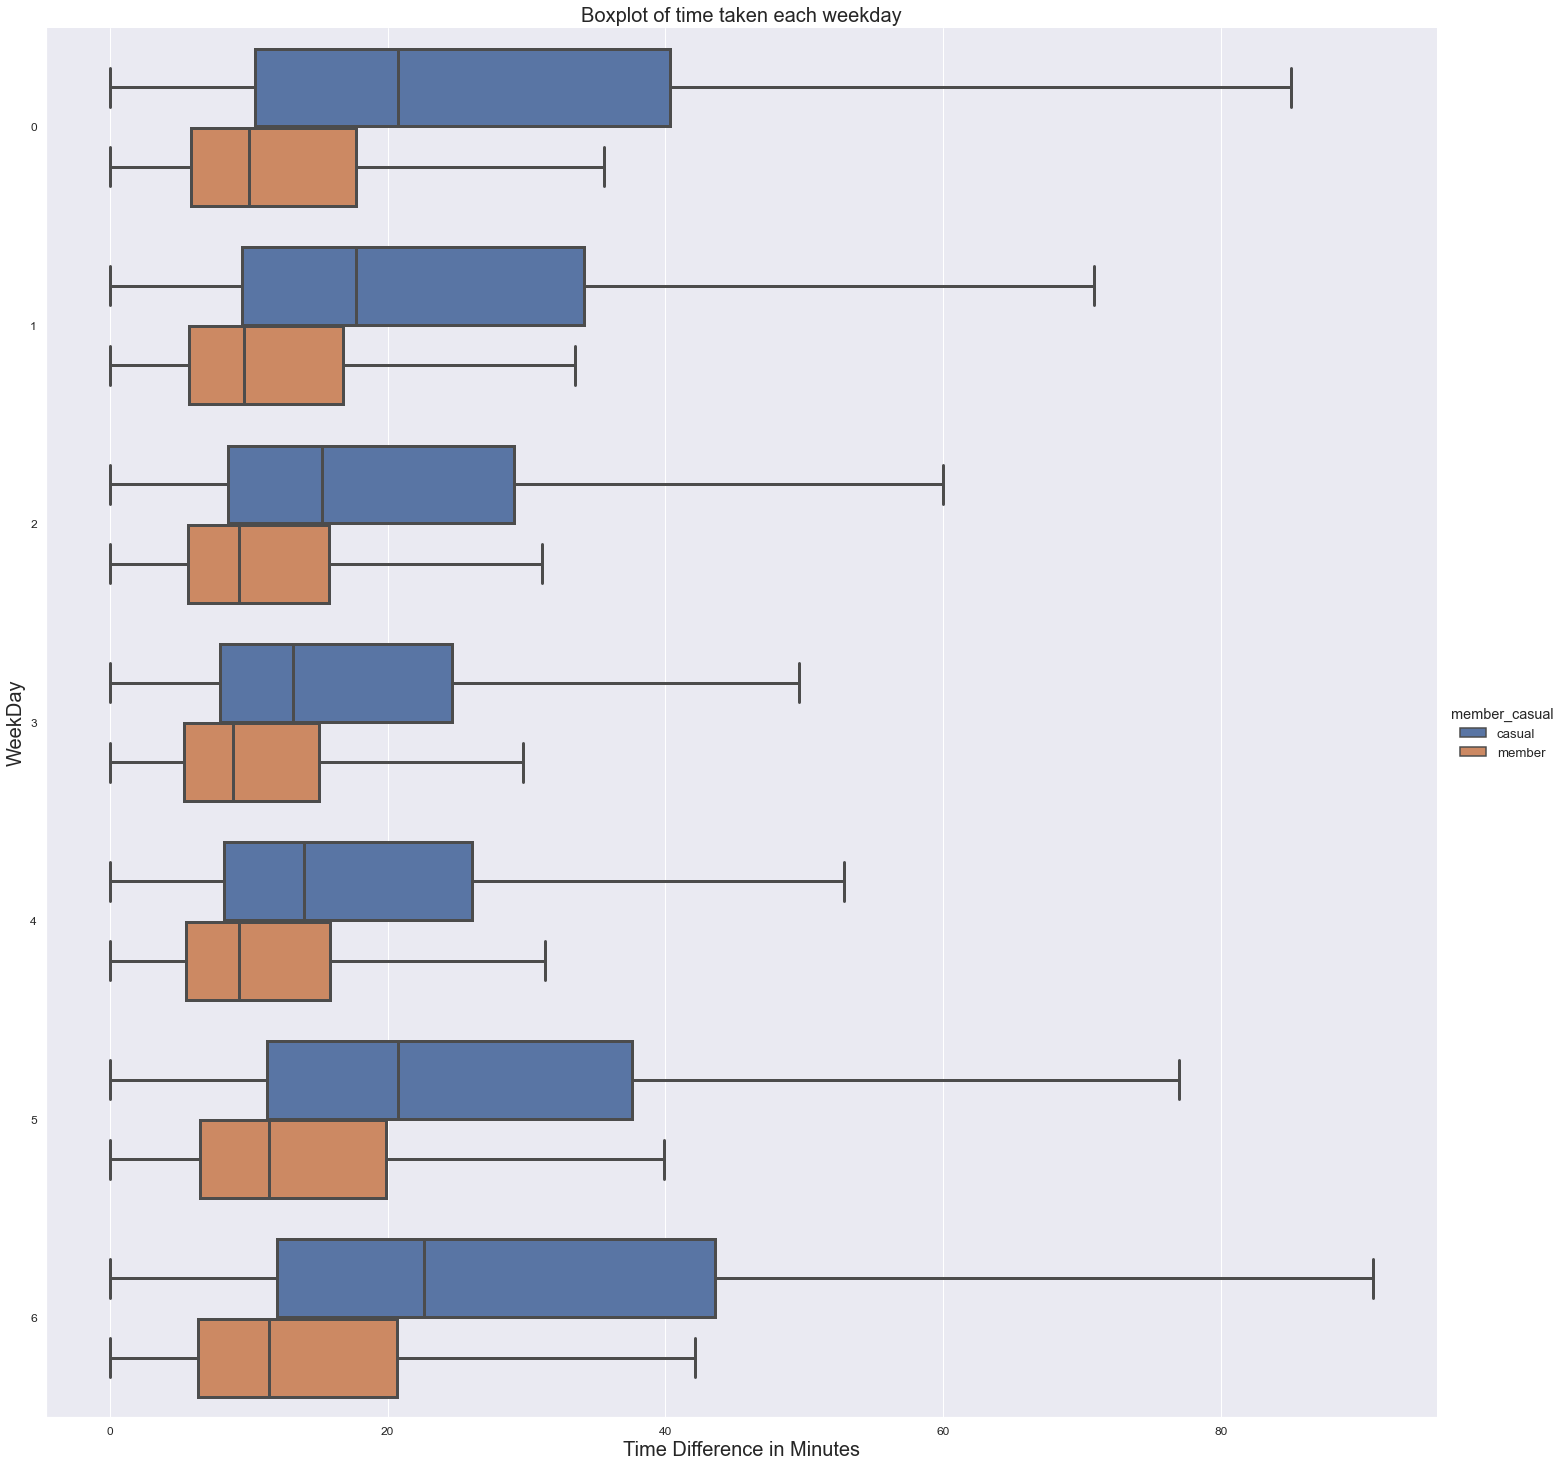

In [35]:
plt.figure(figsize=(20,20))

sns.catplot(x="time_diff", y="weekday",

                hue="member_casual", ci=None,

                data=df, color=None, linewidth=3, showfliers = False,

                orient="h", height=20, aspect=1, palette=None,

                kind="box", dodge=True)

plt.xlabel("Time Difference in Minutes", size=20)
plt.ylabel("WeekDay", size=20)

plt.title("Boxplot of time taken each weekday", size=20)

plt.show()

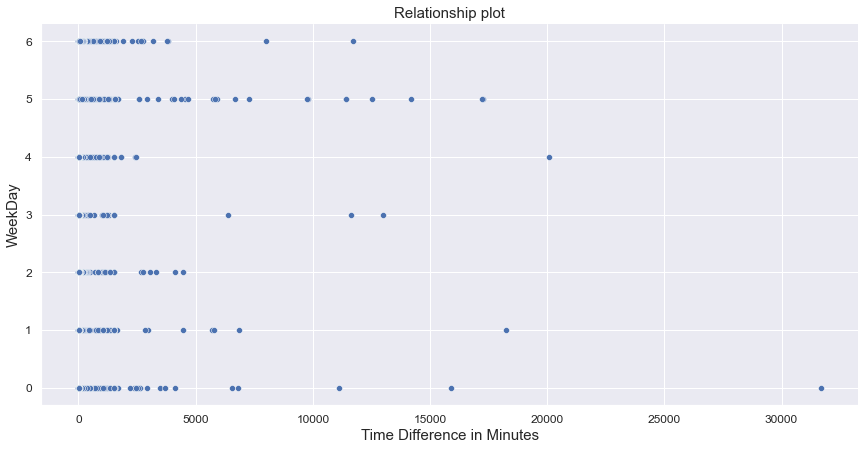

In [36]:
sns.relplot(x="time_diff", y="weekday", data=df, height = 6, aspect = 2)

plt.xlabel("Time Difference in Minutes", size=15)
plt.ylabel("WeekDay", size=15)
plt.title("Relationship plot", size=15)
plt.show()

### Time-Series Analysis

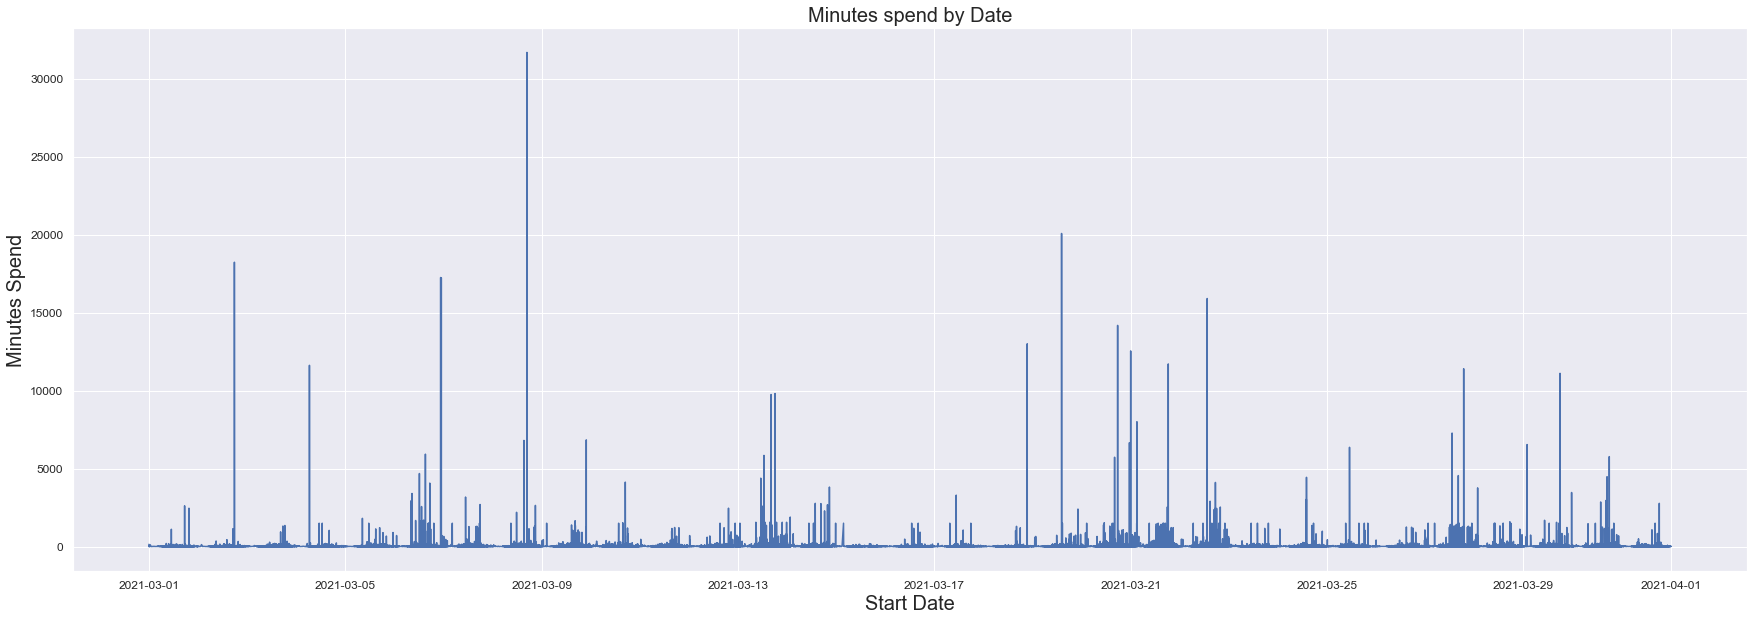

In [37]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.started_at,y=df.time_diff,data=df, estimator=None)
plt.title("Minutes spend by Date", fontsize=20)
plt.xlabel("Start Date", fontsize=20)
plt.ylabel("Minutes Spend", fontsize=20)
plt.show()

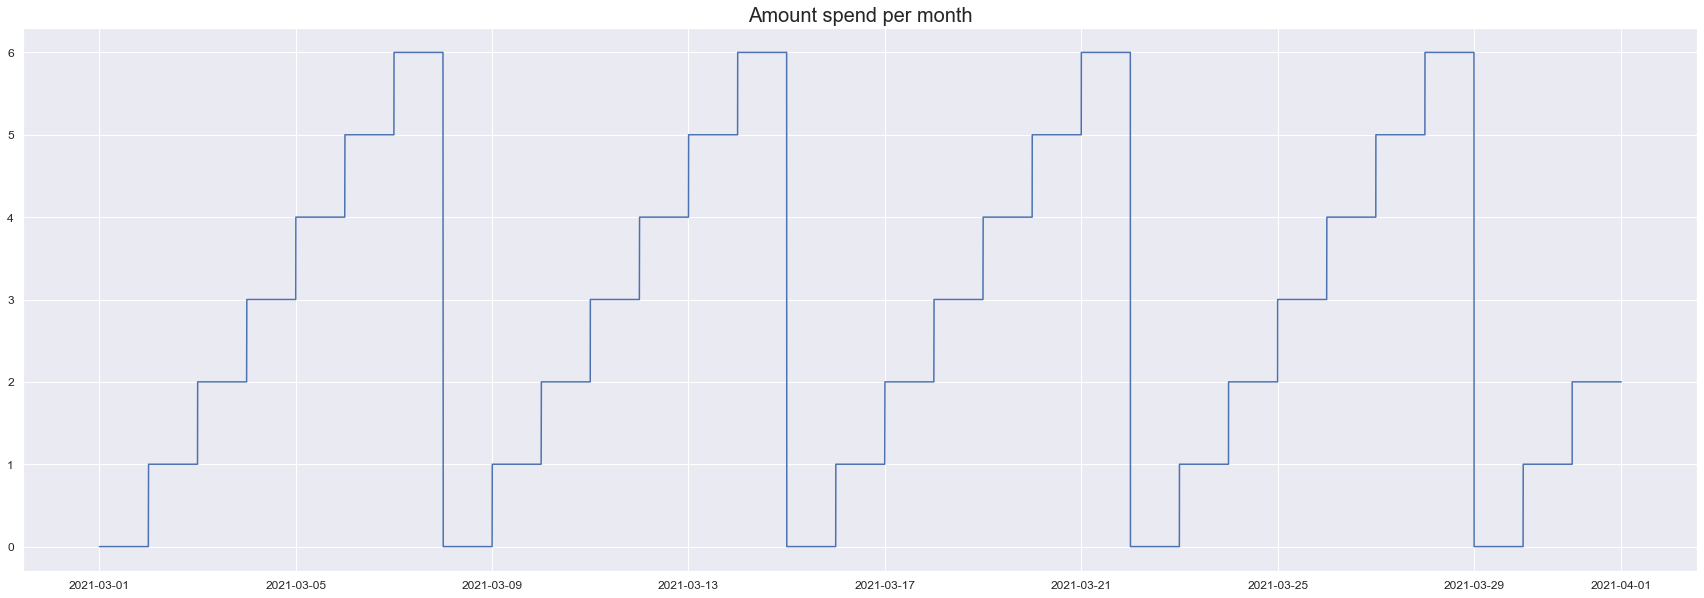

In [38]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.started_at,y=df.weekday, data=df, estimator=None)
plt.title("Amount spend per month", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

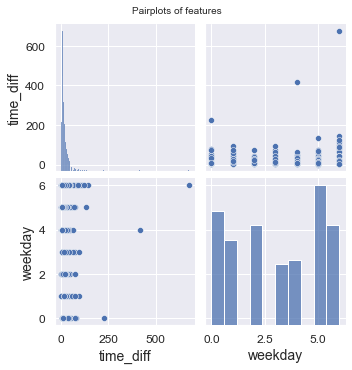

In [39]:
plt.figure(figsize=(20,20))
sns.pairplot(df.sample(500))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=10)
plt.show()

### Correlation

In [40]:
df.corr()

,time_diff,weekday
time_diff,1.00,0.02
weekday,0.02,1.00


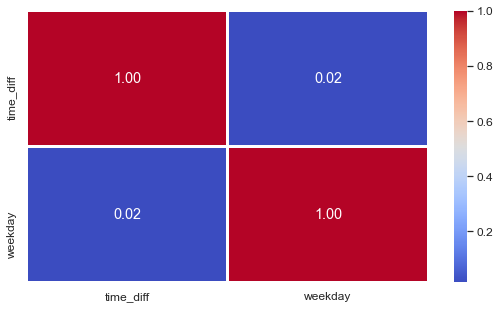

In [41]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

#### Python code done by Dennis Lam